In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_openml
%matplotlib inline

In [2]:
df=fetch_openml(name='Boston',version=1,as_frame=True)

In [3]:
print(df.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [4]:
print(df.DESCR) #Information of Dataset

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [5]:
X=df.data.copy() #.copy() any change made in X will not be refected in df
y=df.target.copy()

In [6]:
print(X.isnull().sum().sort_values(ascending=False).head(5)) #If any null values are present in independent data or the features columns

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
dtype: int64


In [7]:
print(y.isnull().sum()) #If any null values are present in the dependent column

0


In [8]:
print(X.describe()) #It gives the information about the numerical columns data descriptive analysis

             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063  
std      2.105710  168.537116    2.164946   91.294864    7.141062 

In [9]:
print(y.describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [10]:
print(X.corr())
#By default Pearson correlationid use Value Range:
# The value of the coefficient r always falls between -1 and +1.
# r = +1: Represents a perfect positive linear relationship. As one variable increases, the other increases proportionally.
# r = -1: Represents a perfect negative linear relationship. As one variable increases, the other decreases proportionally.
# r = 0: Represents no linear relationship. The two variables do not change in a consistent linear pattern.

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [11]:
print(X.corrwith(y)) #Check the relation between the X and y

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
dtype: float64


KeyboardInterrupt: 

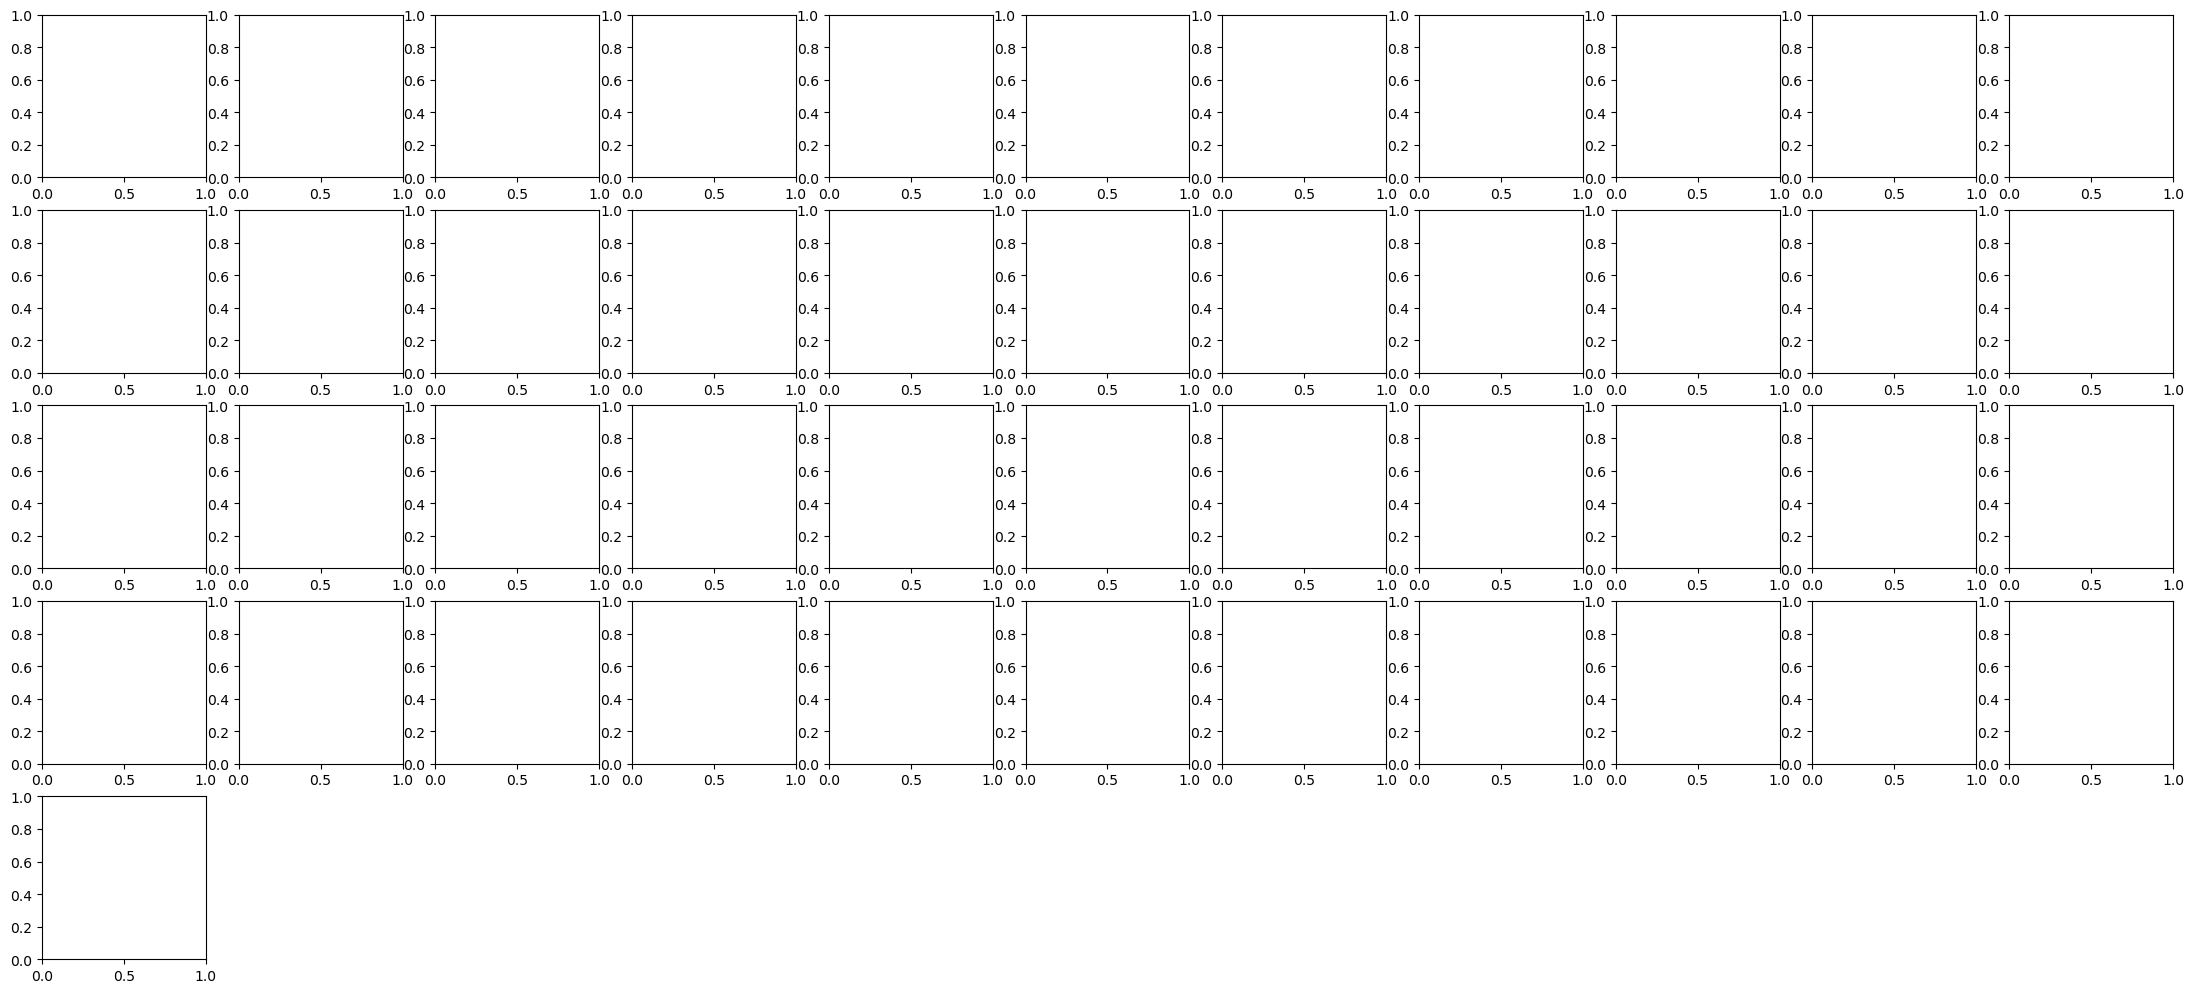

In [12]:
sns.pairplot(X) # Shows the correlation with others in the form of graph

Text(0, 0.5, 'MEDV')

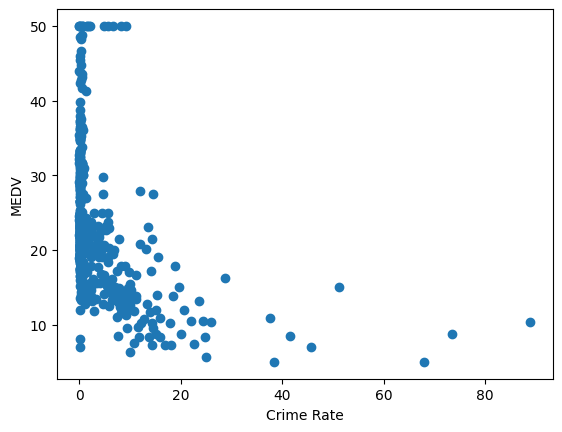

In [ ]:
plt.scatter(X['CRIM'],y)
plt.xlabel("Crime Rate")
plt.ylabel("MEDV")

<Axes: xlabel='RM', ylabel='MEDV'>

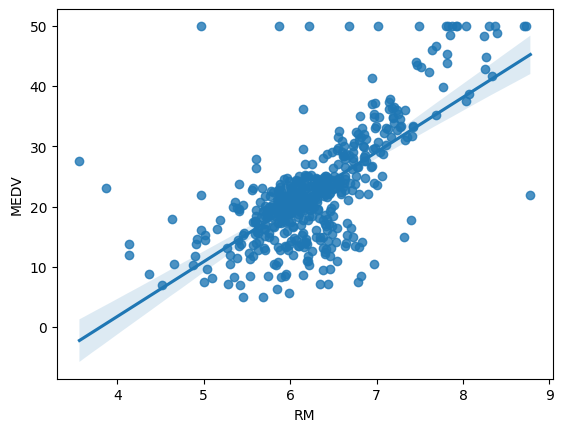

In [ ]:
dataset=pd.concat([X,y],axis=1) #concated X and y
sns.regplot(x='RM',y='MEDV',data=dataset) #ploted a best fit line for linear regression

<Axes: xlabel='CHAS', ylabel='MEDV'>

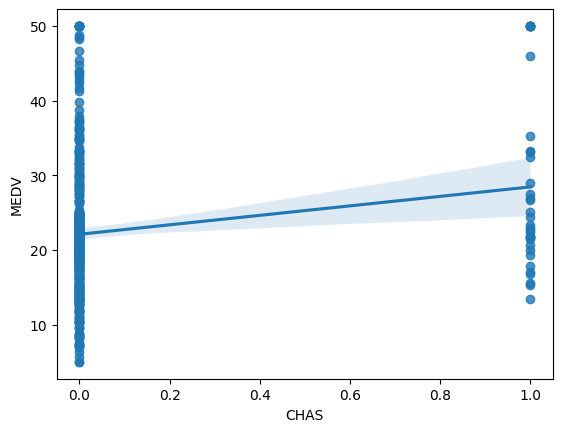

In [ ]:
dataset['CHAS']=dataset['CHAS'].astype(int) #As the data was stored in string formate ,converted into int
sns.regplot(x='CHAS',y='MEDV',data=dataset)


In [ ]:
print(X["CHAS"].unique())

['0', '1']
Categories (2, object): ['0', '1']


In [ ]:
unique_values = y.value_counts()
print(unique_values)

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
12.6     1
16.4     1
17.7     1
12.0     1
8.1      1
Name: count, Length: 229, dtype: int64


In [ ]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # We transform the data to one scale to mininum the loss function and if different scale computer priotize the big values more
#Standardization (or Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1.
X_train=scaler.fit_transform(X_train) # fit_transform calculate and transforms the data
X_test=scaler.transform(X_test) # transform previous calculation tranform the data

In [ ]:
import pickle 
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lr.coef_) #weight of each features

[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [ ]:
#to check the paramter under which the model is trained
print(lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [ ]:
y_pred=lr.predict(X_test)

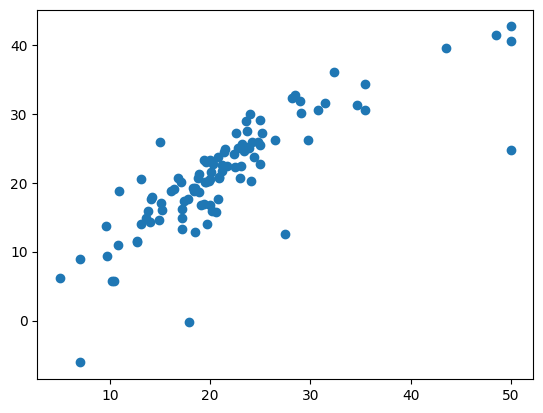

In [ ]:
#plt a scatter plot
plt.scatter(y_test,y_pred)


<Axes: xlabel='MEDV'>

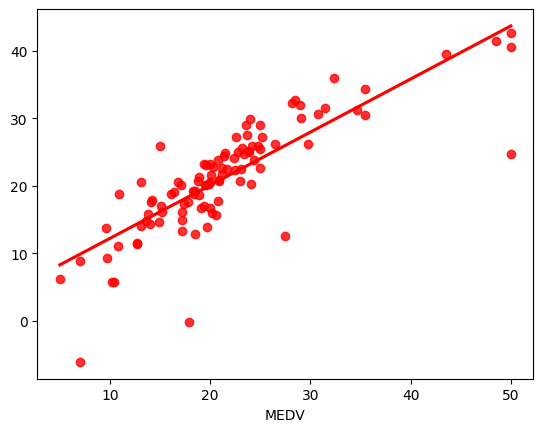

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [ ]:
residual=y_test-y_pred

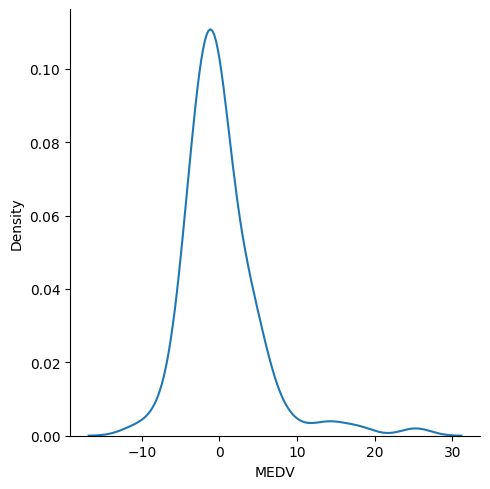

In [ ]:
sns.displot(residual,kind='kde') #right skwed ,means outliers are presnt


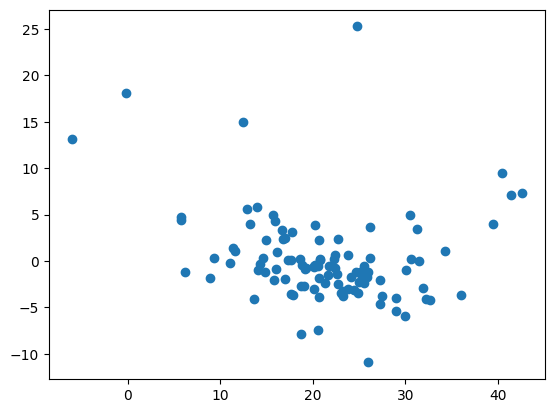

In [ ]:
plt.scatter(y_pred,residual) #points are evenly distributed i.e some errors are common and some are outlier

Text(0.5, 1.0, 'Distribution of MEDV')

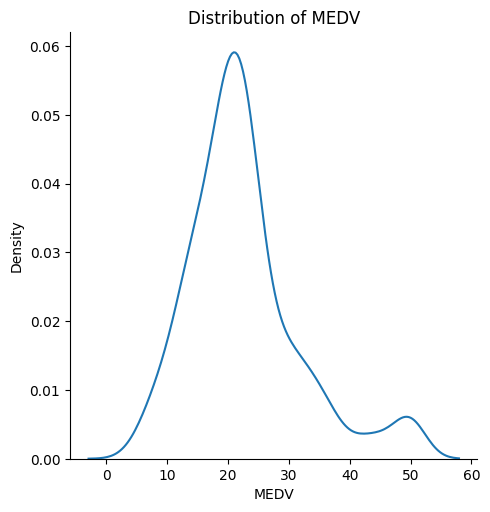

In [ ]:
#Add a graph
sns.displot(y, kind='kde')
plt.xlabel("MEDV")
plt.title("Distribution of MEDV")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))#Root Mean Squared Error (RMSE) measures the average magnitude of the errors between
#the predicted values and the actual values. It's the square root of the average of the squared differences


3.1890919658878474
24.291119474973517
4.928602182665336


In [ ]:
print(r2_score(y_test,y_pred))

0.668759493535632


In [ ]:
n=len(X_test)
p=X_test.shape[1] #13 features
r2=r2_score(y_test,y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(adjusted_r2)
#R_2 can be misleading. It always increases as you add more features to the model, even if those features have no real predictive power.
# This is why Adjusted R-squared is often used, as it penalizes the addition of useless features.

0.6198262368988503


In [ ]:
print(p)

13


In [ ]:
#One-dimensional (1D) data is a single sequence of values, like a simple list or an array.
# In contrast, two-dimensional (2D) data is organized in a grid of rows and columns, like a table or a matrix.
# We often need to reshape 1D data into 2D data because many machine learning libraries and algorithms are specifically designed to work with a 2D format,
# where rows represent individual data points (samples) and columns represent features.
print(X.shape)




(506, 13)


In [ ]:
import pickle

In [ ]:
pickle.dump(lr,open('lr.pkl','wb'))

In [ ]:
pickle_model=pickle.load(open('lr.pkl','rb'))

In [ ]:
#input the data
pickle_model.predict(scaler.transform(df.data.iloc[0].values.reshape(1,-1))) #converting dataframes from pandas dataframes formate to numpy formate

array([29.95339638])

In [ ]:
print(df.data.iloc[0].values)

[np.float64(0.00632) np.float64(18.0) np.float64(2.31) '0'
 np.float64(0.538) np.float64(6.575) np.float64(65.2) np.float64(4.09) '1'
 np.float64(296.0) np.float64(15.3) np.float64(396.9) np.float64(4.98)]


In [ ]:
#piplineing 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

# Example pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe.fit(X, y)

# Save the whole pipeline (model + scaler together)
joblib.dump(pipe, "lr_pipeline.pkl")


['lr_pipeline.pkl']

In [ ]:
{
    "data":{
     "CRIM": 0.02731,
    "ZN": 0.0,
    "INDUS": 7.07,
    "CHAS": 0,
    "NOX": 0.469,
    "RM": 6.421,
    "AGE": 78.9,
    "DIS": 4.9671,
    "RAD": 2,
    "TAX": 242,
    "PTRATIO": 17.8,
    "B": 396.90,
    "LSTAT": 9.14

}
}

{'data': {'CRIM': 0.02731,
  'ZN': 0.0,
  'INDUS': 7.07,
  'CHAS': 0,
  'NOX': 0.469,
  'RM': 6.421,
  'AGE': 78.9,
  'DIS': 4.9671,
  'RAD': 2,
  'TAX': 242,
  'PTRATIO': 17.8,
  'B': 396.9,
  'LSTAT': 9.14}}

In [ ]:

import pandas as pd
df_input = pd.DataFrame([data_dict])

scaled_input = scaler.transform(df_input)


prediction = pickle_model.predict(scaled_input)

# 4. Print the result
print(f"The predicted price is: {prediction[0]}")

The predicted price is: 29.953396377335693


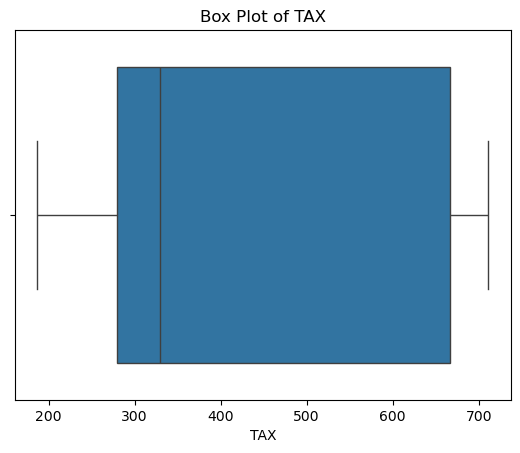

In [16]:

sns.boxplot(x=X['TAX'])
plt.title('Box Plot of TAX')
plt.xlabel('TAX')
plt.show()
